# Ensemble Regression Method


In [1]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()
import seaborn as sns

import numpy as np
boston.data = np.delete(boston.data, obj=11, axis=1)
boston.feature_names = np.delete(boston.feature_names, obj=11, axis=0)

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

X=X[y<50]
y=y[y<50]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)



/home/andrea/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

## Random forest


In [2]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.ensemble import RandomForestRegressor 
import numpy as np

regressor = RandomForestRegressor()
parameters = {"n_estimators":[5,10,100,200], "criterion": ['squared_error'], 
              "min_samples_leaf": [0.03,0.05,0.1,0.3], "random_state" : [42]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.805431 using {'criterion': 'squared_error', 'min_samples_leaf': 0.03, 'n_estimators': 200, 'random_state': 42}
0.780553 (0.025449) with: {'criterion': 'squared_error', 'min_samples_leaf': 0.03, 'n_estimators': 5, 'random_state': 42}
0.800261 (0.023224) with: {'criterion': 'squared_error', 'min_samples_leaf': 0.03, 'n_estimators': 10, 'random_state': 42}
0.805002 (0.026021) with: {'criterion': 'squared_error', 'min_samples_leaf': 0.03, 'n_estimators': 100, 'random_state': 42}
0.805431 (0.025726) with: {'criterion': 'squared_error', 'min_samples_leaf': 0.03, 'n_estimators': 200, 'random_state': 42}
0.754943 (0.030799) with: {'criterion': 'squared_error', 'min_samples_leaf': 0.05, 'n_estimators': 5, 'random_state': 42}
0.759677 (0.033161) with: {'criterion': 'squared_error', 'min_samples_leaf': 0.05, 'n_estimators': 10, 'random_state': 42}
0.763825 (0.037123) with: {'criterion': 'squared_error', 'min_samples_leaf': 0.05, 'n_estimators': 100, 'random_

0.8331410666131309

In [3]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  2.0023734890985114
MSE train:  7.941959334643329
RMSE train:  2.818148210198202
r2:  0.9367557836532437
MAE test:  2.2453404722068657
MSE test:  8.761369478705708
RMSE test:  2.959961060336049
r2:  0.9127656142806492


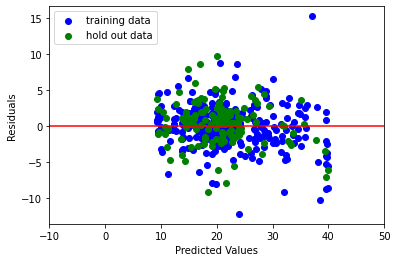

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [5]:
from sklearn import tree
r = tree.export_text(gs.best_estimator_.estimators_[40],feature_names=columns.tolist(), max_depth=3)
print(r)


|--- LSTAT <= 7.87
|   |--- RM <= 7.11
|   |   |--- LSTAT <= 5.80
|   |   |   |--- value: [30.00]
|   |   |--- LSTAT >  5.80
|   |   |   |--- RM <= 6.49
|   |   |   |   |--- value: [24.29]
|   |   |   |--- RM >  6.49
|   |   |   |   |--- value: [25.70]
|   |--- RM >  7.11
|   |   |--- value: [37.51]
|--- LSTAT >  7.87
|   |--- LSTAT <= 19.09
|   |   |--- LSTAT <= 14.80
|   |   |   |--- RM <= 6.55
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- RM >  6.55
|   |   |   |   |--- value: [25.70]
|   |   |--- LSTAT >  14.80
|   |   |   |--- CRIM <= 0.22
|   |   |   |   |--- value: [20.73]
|   |   |   |--- CRIM >  0.22
|   |   |   |   |--- truncated branch of depth 2
|   |--- LSTAT >  19.09
|   |   |--- CRIM <= 14.14
|   |   |   |--- NOX <= 0.65
|   |   |   |   |--- value: [15.65]
|   |   |   |--- NOX >  0.65
|   |   |   |   |--- value: [13.31]
|   |   |--- CRIM >  14.14
|   |   |   |--- value: [9.67]



In [6]:
# We can export as a figure but we must install graphviz https://graphviz.gitlab.io/download/

# Install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} graphviz
#!{sys.executable} -m pip install graphviz

from sklearn import tree
tree.export_graphviz(gs.best_estimator_.estimators_[0], out_file='tree_from_forest.dot',feature_names=columns.tolist(),max_depth=4)

In [7]:
!dot -Tpng tree_from_forest.dot -o tree_from_forest.png -Gdpi=600

In [8]:
from IPython.display import Image
Image(filename = 'tree_from_forest.png')

<AxesSubplot:>

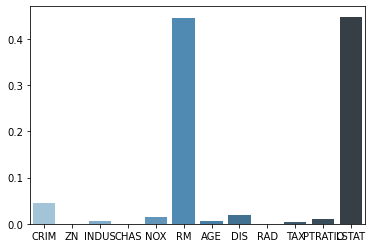

In [9]:
sns.barplot(x=columns, y=gs.best_estimator_.feature_importances_, palette="Blues_d")

## AdaBoost

In [10]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


# NOTE THE POSSIBILITY TO USE DIFFERENT WEAK LEARNERS!
base1=SVR(kernel='linear')
base2=DecisionTreeRegressor(max_depth=3)

regressor = AdaBoostRegressor()
parameters = {"n_estimators":[10,50], "base_estimator": [base1,base2], 
              "learning_rate":[0.5,1.0,1.1], "random_state" : [4]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.818018 using {'base_estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 1.1, 'n_estimators': 50, 'random_state': 4}
0.754293 (0.018244) with: {'base_estimator': SVR(kernel='linear'), 'learning_rate': 0.5, 'n_estimators': 10, 'random_state': 4}
0.723623 (0.029211) with: {'base_estimator': SVR(kernel='linear'), 'learning_rate': 0.5, 'n_estimators': 50, 'random_state': 4}
0.698094 (0.014322) with: {'base_estimator': SVR(kernel='linear'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state': 4}
0.703393 (0.048487) with: {'base_estimator': SVR(kernel='linear'), 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 4}
0.701389 (0.024797) with: {'base_estimator': SVR(kernel='linear'), 'learning_rate': 1.1, 'n_estimators': 10, 'random_state': 4}
0.729350 (0.039601) with: {'base_estimator': SVR(kernel='linear'), 'learning_rate': 1.1, 'n_estimators': 50, 'random_state': 4}
0.799705 (0.024860) with: {'base_estimator': DecisionTreeRegress

0.8391941010706202

In [11]:
y_train_pred=gs.predict(X_train)
y_pred=gs.predict(X_test)


In [12]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, y_train_pred)) 
print("MSE train: ",metrics.mean_squared_error(y_train, y_train_pred))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("r2: ",np.sqrt(metrics.r2_score(y_train, y_train_pred)))

print("MAE test: ", metrics.mean_absolute_error(y_test,y_pred)) 
print("MSE test: ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2: ",np.sqrt(metrics.r2_score(y_test, y_pred)))

MAE train:  2.0317766582634964
MSE train:  6.194171370335019
RMSE train:  2.488809227388676
r2:  0.951034951943927
MAE test:  2.290264216430429
MSE test:  8.443538900066915
RMSE test:  2.9057768152538688
r2:  0.916075379578897


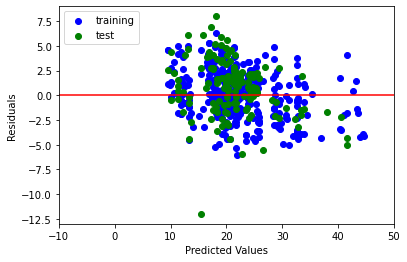

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),y_train_pred-y_train, c="b", label="training")
plt.scatter(gs.predict(X_test),y_pred-y_test, c="g", label="test")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

<AxesSubplot:>

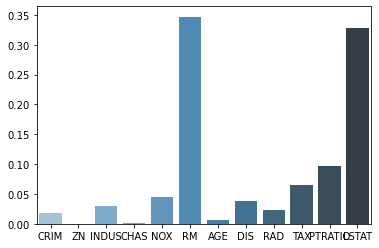

In [14]:
sns.barplot(x=columns, y=gs.best_estimator_.feature_importances_, palette="Blues_d")

# Gradient Boosting

![GB](gb.png)

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[20,50,70,100,200], "learning_rate":[0.1, 0.5,1,2], 
              "random_state" : [0] ,
             "max_depth":[1,2]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) 

gs = gs.fit(X_train,y_train)


#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.865639 using {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'random_state': 0}
0.670644 (0.015695) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 20, 'random_state': 0}
0.809775 (0.017799) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50, 'random_state': 0}
0.824316 (0.017206) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 70, 'random_state': 0}
0.832255 (0.016889) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100, 'random_state': 0}
0.841757 (0.019125) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200, 'random_state': 0}
0.800214 (0.018016) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 20, 'random_state': 0}
0.847201 (0.019217) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50, 'random_state': 0}
0.853358 (0.020359) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 70, 'random_state': 0}
0.857465 (0.020767) with: {'learnin

0.8697092836355798

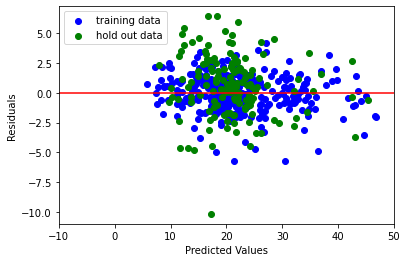

In [16]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [17]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  1.1672072933344946
MSE train:  2.2503520905635126
RMSE train:  1.5001173589301313
r2:  0.9824931994006348
MAE test:  2.0338837871725866
MSE test:  6.841258556215642
RMSE test:  2.6155799655555634
r2:  0.9325820519587431


<AxesSubplot:>

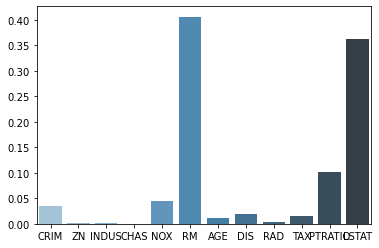

In [18]:
sns.barplot(x=columns, y=gs.best_estimator_.feature_importances_, palette="Blues_d")